    Timestamp  Temperature  Precipitation  Wind Speed  Wind Direction
0  1640995200    48.308952            0.0    4.802906       152.24146
1  1640998800    48.020950            0.0    5.149814       145.61966
2  1641002400    47.732952            0.0    5.061609       135.00000
3  1641006000    46.922950            0.0    4.787252       127.40535
4  1641009600    46.364952            0.0    4.802906       117.75854
The shape of our feature is: (7248, 5)
Temperature (Y): [48.308952 48.02095  47.732952 ... 63.21295  62.834953 63.446953]
Columns (X): ['Timestamp', 'Precipitation', 'Wind Speed', 'Wind Direction']
Training data shape: (5073, 4)
Training labels shape: (5073,)
Testing data shape: (2175, 4)
Testing label shape: (2175,)
Wait...
[67.8367545  84.52414106 44.13921446 ... 70.60546039 57.06368224
 41.43732497]
Mean Absolute Error: 2.99 degrees.
Accuracy of logistic regression classifier on test set: 0.92


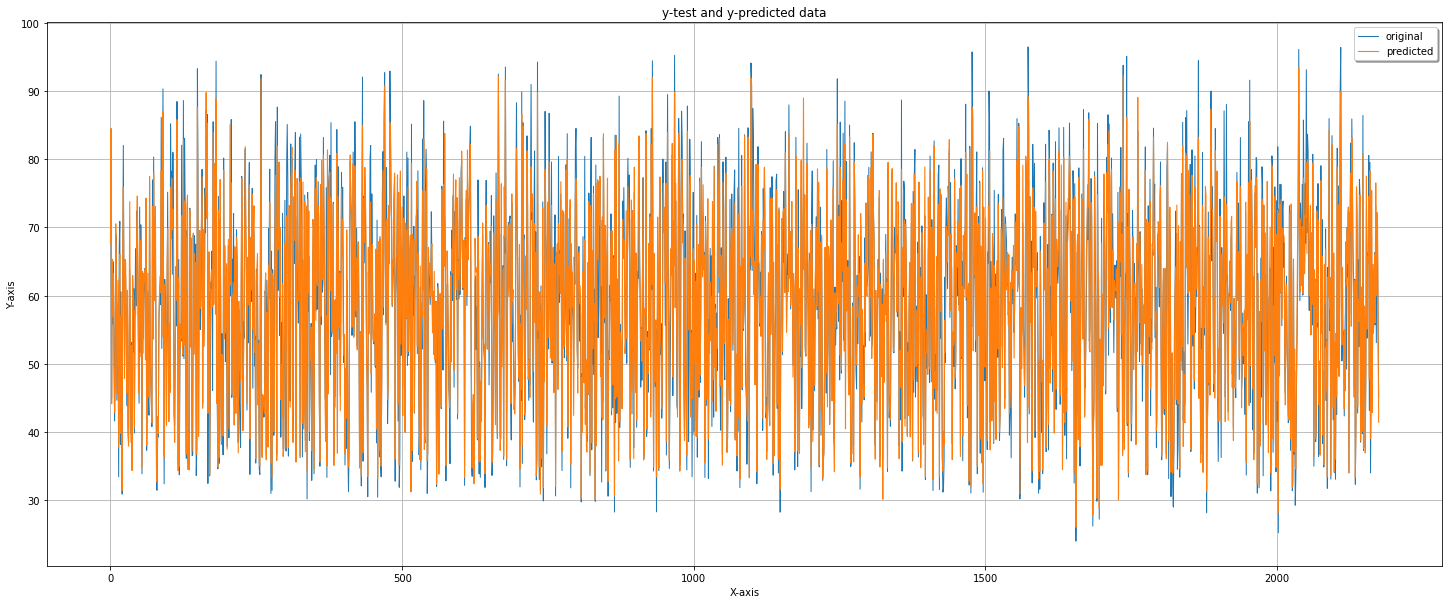

In [5]:
import urllib.request
urllib.request.urlretrieve('https://raw.githubusercontent.com/dgofman/PythonAI/main/AI-Final/dataexport_20221029T025321.csv', '/content/dataexport_20221029T025321.py')

from datetime import datetime
from time import mktime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

epoc = lambda t : int(mktime(datetime.strptime(t, "%Y%m%dT%H%M%S").timetuple()))
data = pd.read_csv('/content/dataexport_20221029T025321.py', sep=',', converters={'Timestamp': epoc})

print(data.head(5))
print('The shape of our feature is:', data.shape)
data.describe()

data = pd.get_dummies(data)
data.head(5)

labels = np.array(data['Temperature'])
data = data.drop('Temperature', axis=1)
data_list = list(data.columns)
print('Temperature (Y):', labels)
print('Columns (X):', data_list)

data = np.array(data)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.30,random_state=4)

print('Training data shape:', X_train.shape)
print('Training labels shape:', y_train.shape)
print('Testing data shape:', X_test.shape)
print('Testing label shape:', y_test.shape)
rf = RandomForestRegressor(n_estimators=1000, random_state=4)
print('Wait...')
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
print(predictions)
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)))

# Visualising the Random Forest Regression results
x_ax = range(len(y_test))
plt.figure(figsize=(25, 10))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, predictions, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()